## seaborn

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import seaborn as sns


input_dir = "/Users/apple/Desktop/KB/data"
# Load dataset
adata = ad.read_h5ad(input_dir+'/BiddyData/biddy_6534_2000_norm_log.h5ad')

In [4]:
len(adata.obs["clone_id"].unique())

169

In [5]:
adata.obs["cell_type"].value_counts()/adata.obs.shape[0]

cell_type
iEP           0.561524
Fibroblast    0.230793
Ambiguous     0.207683
Name: count, dtype: float64

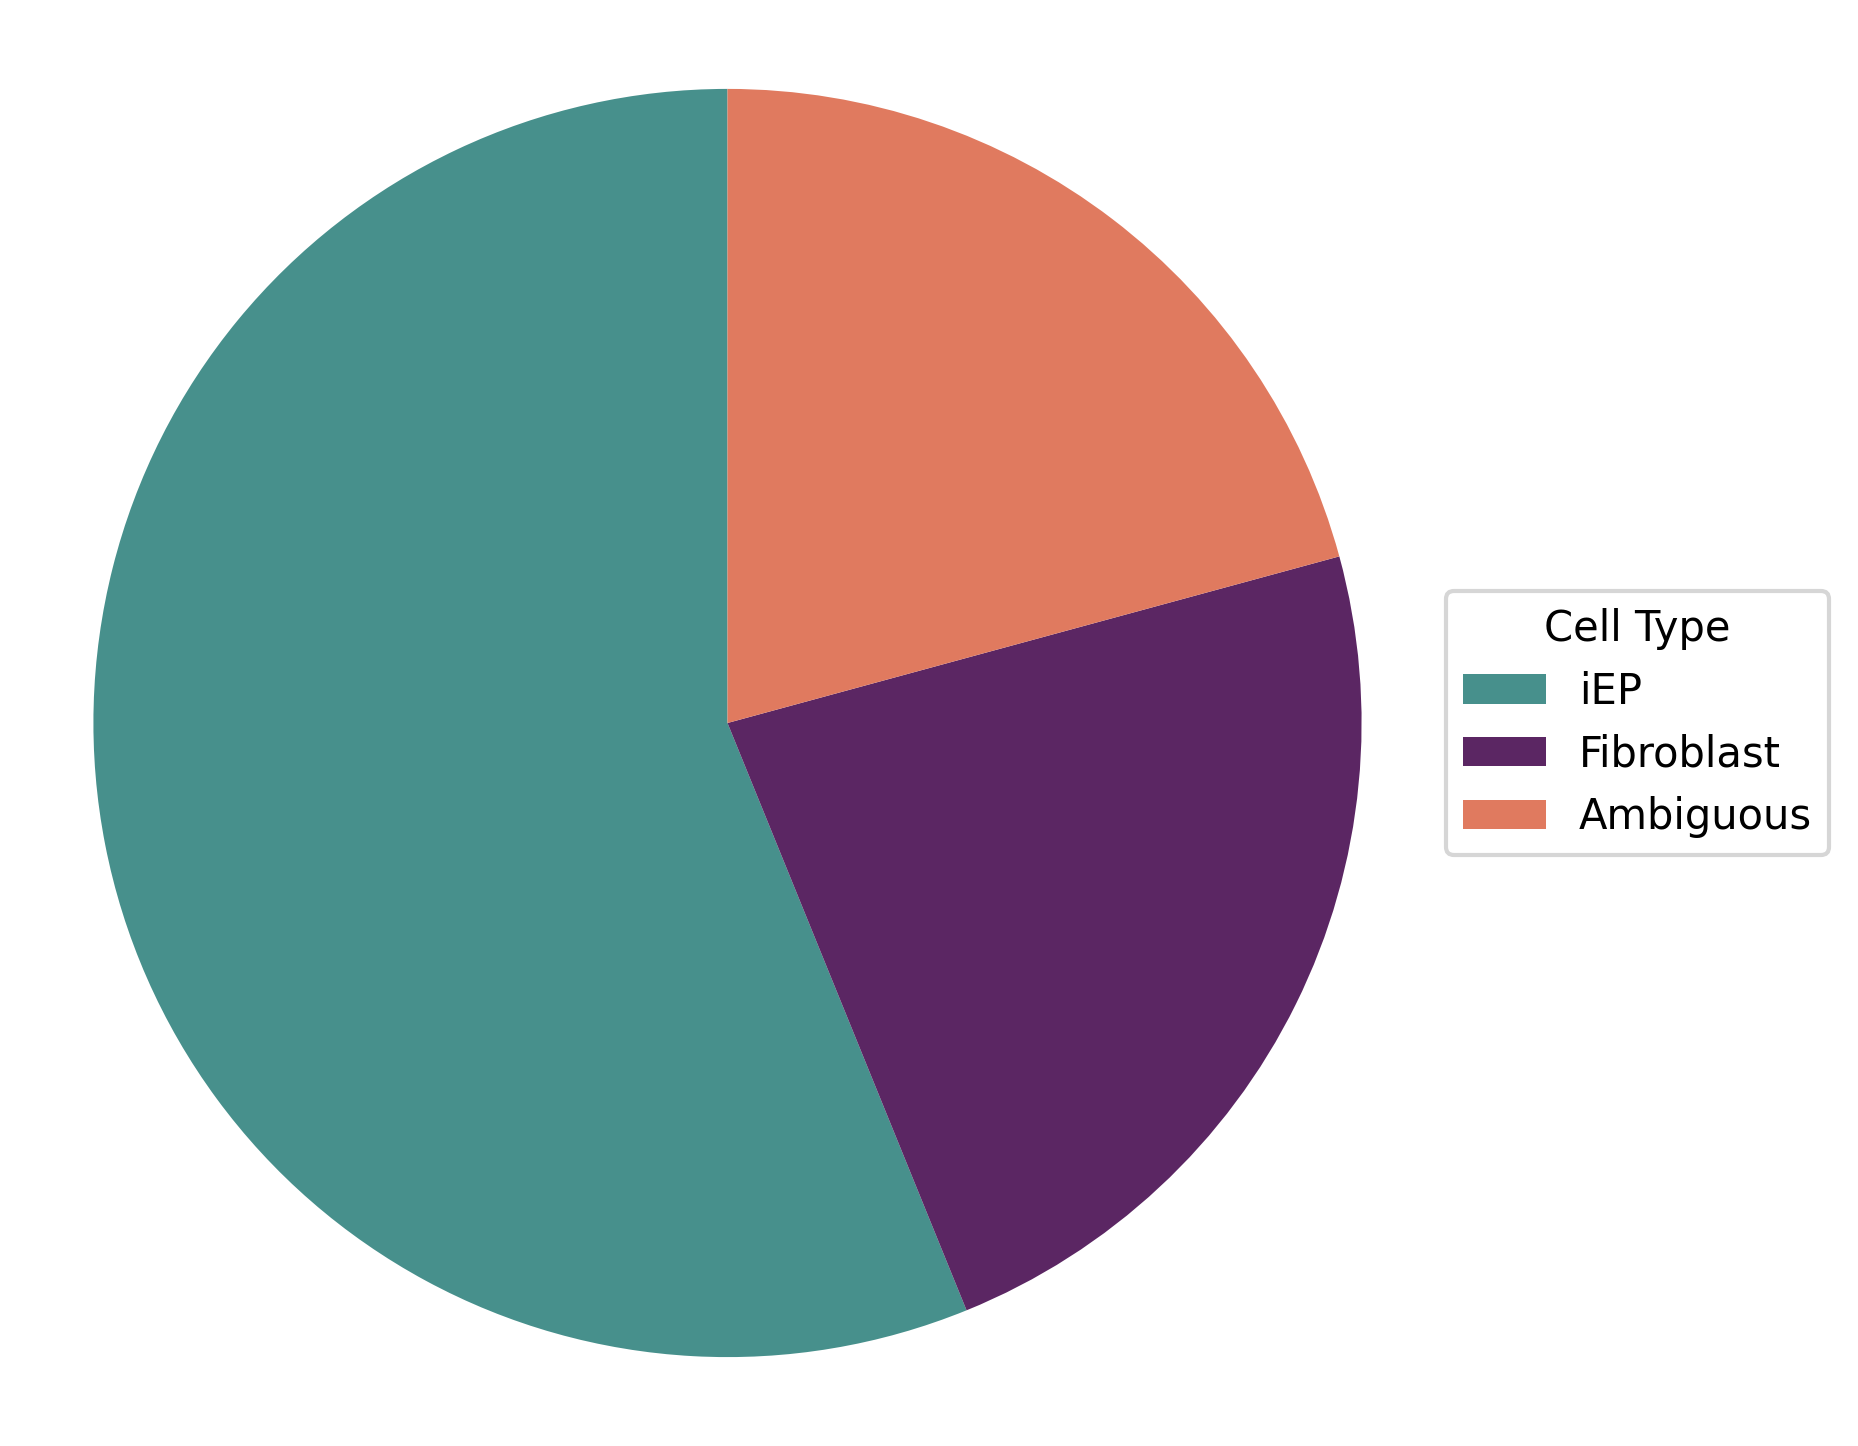

In [5]:
# Extract cell type counts
cell_type_counts = adata.obs["cell_type"].value_counts()

# Define the RGB colors for the cell types (converted to hex codes)
cell_type_colors = {
    'Fibroblast': '#5B2663',   # RGB (91, 38, 99)
    'iEP': '#47908C',          # RGB (71, 144, 140)
    'Ambiguous': '#E07A5F'     # RGB (224, 122, 95)
}

# Extract the colors in the same order as the cell types
colors = [cell_type_colors[cell_type] for cell_type in cell_type_counts.index]

# Plot the pie chart without percentages
plt.figure(figsize=(6, 6), dpi=300)
wedges, texts = plt.pie(cell_type_counts, colors=colors, startangle=90)

# Add legend
plt.legend(wedges, cell_type_counts.index, title="Cell Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


In [6]:
adata.obs["reprogramming_day"].value_counts()/adata.obs.shape[0]

reprogramming_day
28    0.375115
21    0.296908
12    0.147995
15    0.144169
9     0.032599
6     0.003214
Name: count, dtype: float64

In [10]:
from matplotlib.colors import LinearSegmentedColormap

# Extract reprogramming day counts
reprogramming_day_counts = adata.obs['reprogramming_day'].value_counts()

# Get the unique reprogramming days sorted from earliest to latest
reprogramming_day_unique = np.sort(np.unique(adata.obs['reprogramming_day'].astype(int))).astype(str)
print(reprogramming_day_unique)

['6' '9' '12' '15' '21' '28']


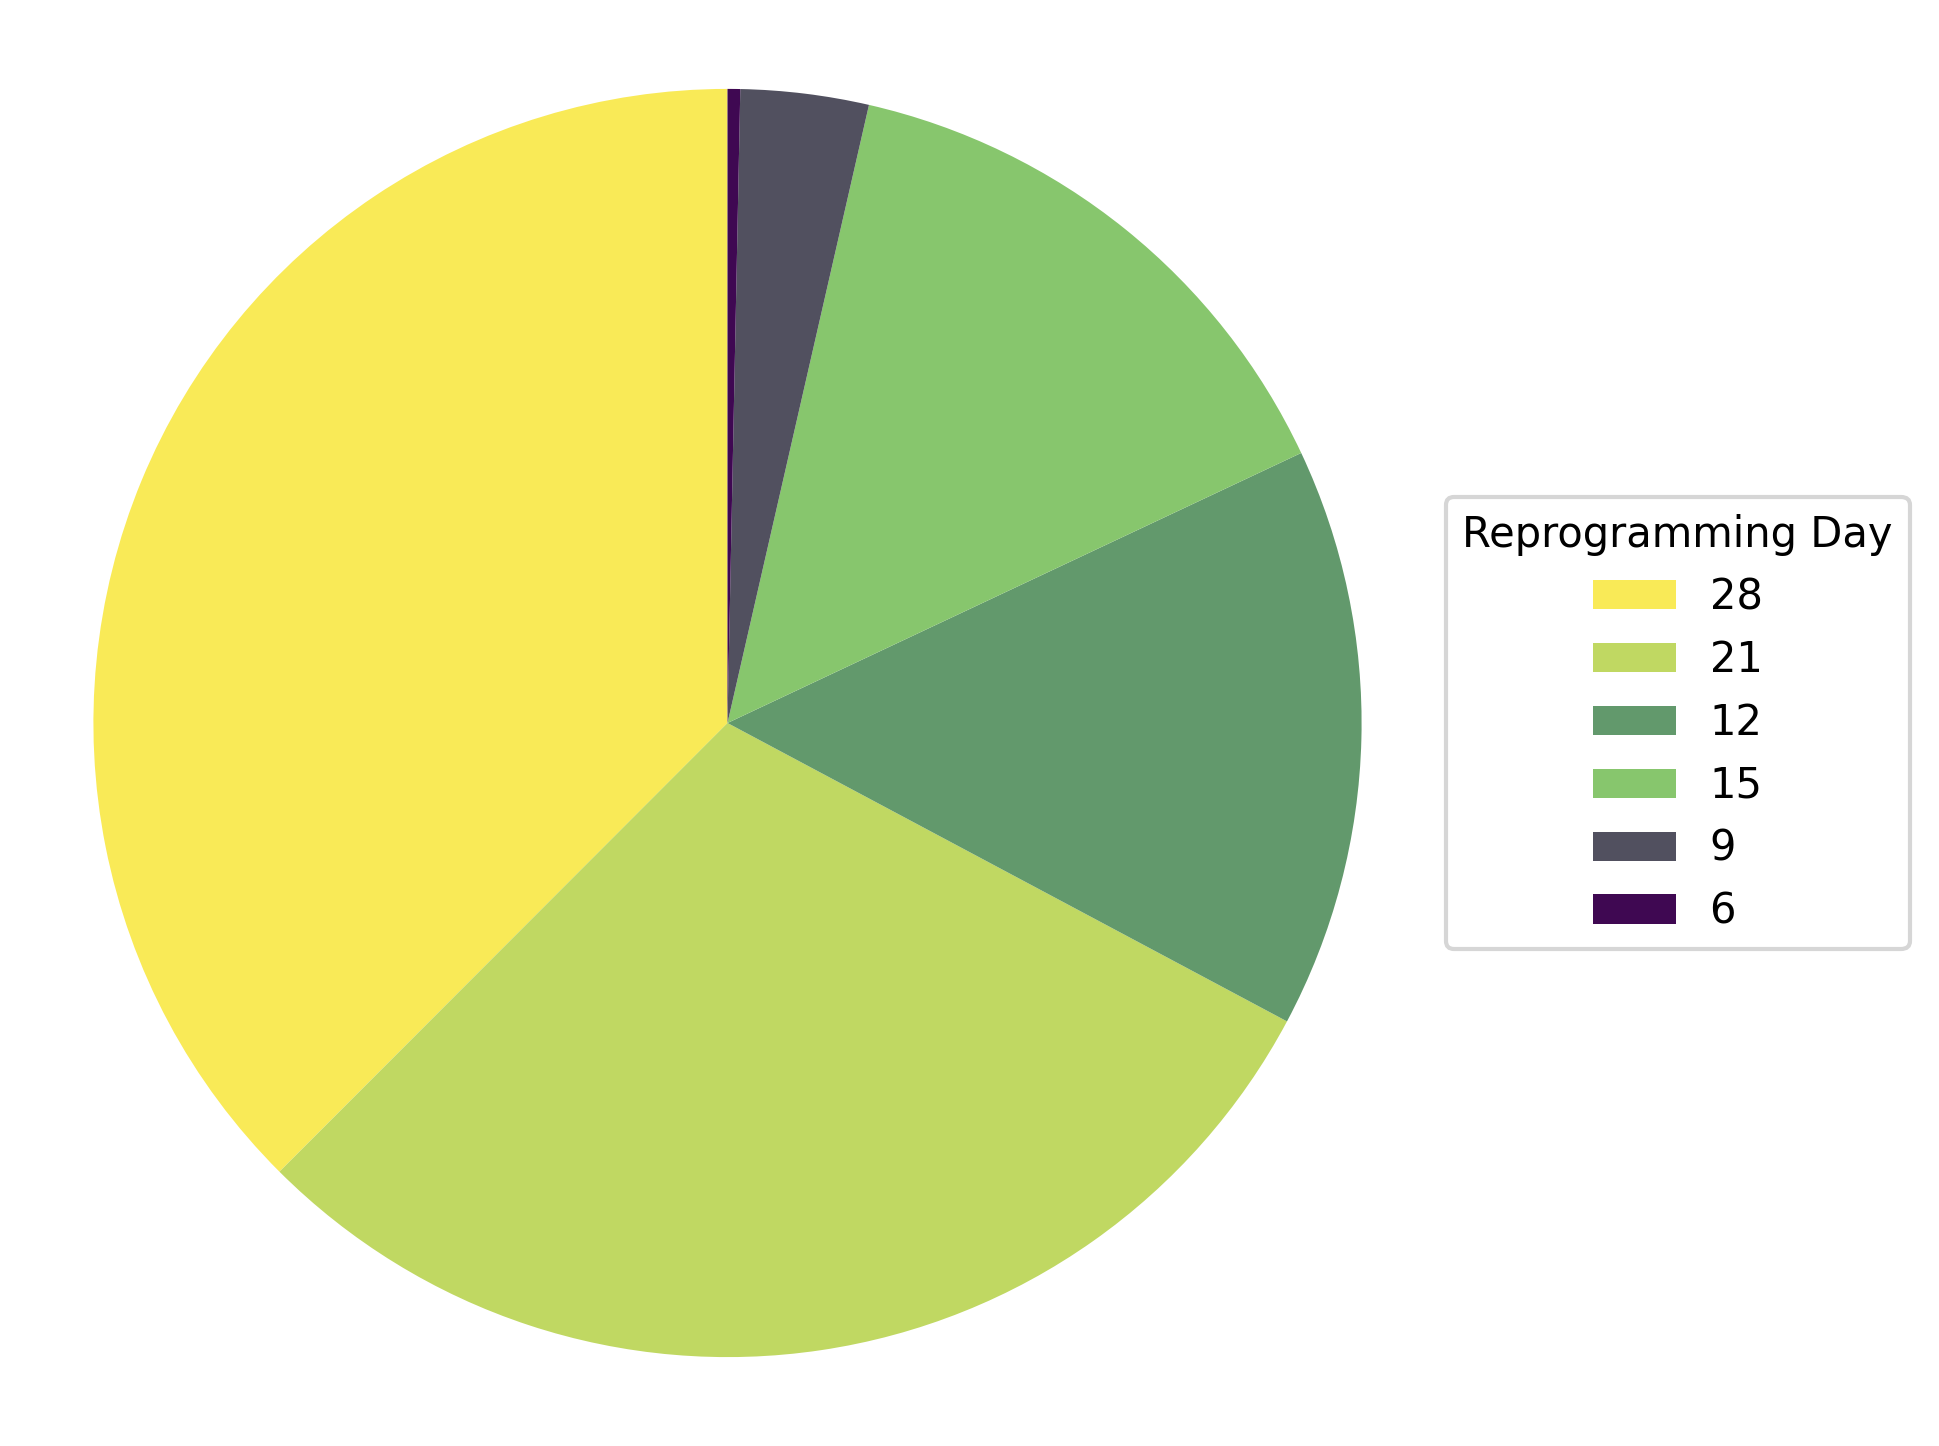

In [11]:
# Define the RGB colors for the first, middle, and last timepoints (convert to 0-1 scale)
first_color = (63/255, 8/255, 82/255)
middle_color = (107/255, 189/255, 115/255)
last_color = (249/255, 234/255, 87/255)

# Create a colormap that interpolates between the first, middle, and last colors
cmap = LinearSegmentedColormap.from_list("time_colormap", [first_color, middle_color, last_color], N=len(reprogramming_day_unique))

# Generate the colors for each reprogramming day using the colormap
reprogramming_palette = [cmap(i / (len(reprogramming_day_unique) - 1)) for i in range(len(reprogramming_day_unique))]

# Create a list of colors for each reprogramming day
colors = [reprogramming_palette[np.where(reprogramming_day_unique == day)[0][0]] for day in reprogramming_day_counts.index]

# Plot the pie chart without percentages
plt.figure(figsize=(6, 6), dpi=300)
wedges, texts = plt.pie(reprogramming_day_counts, colors=colors, startangle=90)

# Add legend
plt.legend(wedges, reprogramming_day_counts.index, title="Reprogramming Day", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()
